In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import ri_basic
import os

# EXERCICE 1

## Most occurent words

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/tp-
[nltk_data]     home004/fbertel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
#Getting the list of the data files 
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('./data/texts/') if isfile(join('./data/texts/', f))]

In [4]:
cd ./data/texts/

/home/tp-home004/fbertel/M2_AIC/NLP/TP3/data/texts


In [5]:
#For each file tokenize and add it to full_text
full_text = []
for file in onlyfiles:
    full_text.append(ri_basic.get_tokens(file))

In [6]:
#Making one flat list from a list of list
full_text = [item for sublist in full_text for item in sublist]

In [7]:
#Gettinbg the most common words
most_comon_words = ri_basic.get_most_common_tokens(full_text , 1000)

In [8]:
most_comon_words

[('sent', 7112),
 ('the', 4400),
 ('of', 2736),
 ('and', 2725),
 ('to', 2382),
 ('in', 1793),
 ('a', 1525),
 ('is', 981),
 ('that', 906),
 ('for', 899),
 ('with', 654),
 ('as', 574),
 ('s', 518),
 ('it', 483),
 ('are', 479),
 ('or', 470),
 ('by', 456),
 ('was', 437),
 ('on', 433),
 ('from', 415),
 ('be', 415),
 ('not', 398),
 ('he', 394),
 ('lrb', 391),
 ('rrb', 391),
 ('music', 367),
 ('have', 360),
 ('his', 359),
 ('at', 346),
 ('but', 305),
 ('has', 295),
 ('this', 289),
 ('can', 289),
 ('aids', 281),
 ('an', 272),
 ('which', 264),
 ('you', 242),
 ('more', 239),
 ('ad', 235),
 ('they', 234),
 ('one', 218),
 ('i', 218),
 ('we', 211),
 ('other', 195),
 ('will', 192),
 ('all', 180),
 ('also', 179),
 ('its', 176),
 ('when', 170),
 ('than', 169),
 ('their', 168),
 ('us', 167),
 ('disease', 167),
 ('such', 162),
 ('into', 156),
 ('were', 156),
 ('these', 153),
 ('water', 152),
 ('there', 150),
 ('been', 145),
 ('africa', 145),
 ('nt', 144),
 ('world', 143),
 ('who', 142),
 ('my', 141),
 (

## Most occurent lemmas and roots

In [9]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer 

ps = PorterStemmer() 

In [10]:
print(ps.stem("worked"))

work


In [11]:
stem_list = [ps.stem(word) for word in full_text]

In [12]:
most_common_stem = ri_basic.get_most_common_tokens(stem_list,1000)

## Most important categories


In [13]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/tp-home004/fbertel/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [14]:
pos_tagg = pos_tag(full_text)

In [15]:
from collections import defaultdict
counts = defaultdict(int)
for word, tag in pos_tagg:
     counts[tag] += 1



In [16]:
counts = sorted(counts.items(), key=lambda v: v[1], reverse=True)

In [17]:
counts[:15]

[('NN', 21725),
 ('IN', 10840),
 ('JJ', 9346),
 ('DT', 7421),
 ('NNS', 6818),
 ('VBD', 5032),
 ('VBN', 4139),
 ('RB', 3787),
 ('CC', 3534),
 ('VB', 3067),
 ('TO', 2382),
 ('VBZ', 2214),
 ('PRP', 2088),
 ('CD', 1946),
 ('VBP', 1922)]

The most present category is NN ie Noun, which is an interesting information as a noun describes well the meaning.

# EXERCICE 2

In [18]:
from collections import Counter

In [19]:
words_count = ri_basic.get_most_common_tokens(full_text, len(full_text) )
list_frequency = [words_count[i][1] for i in range (len(words_count))]
c = Counter(list_frequency)

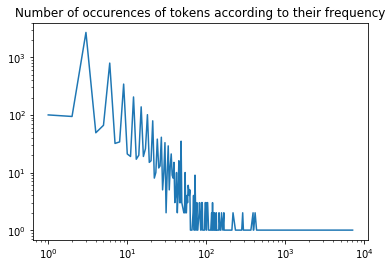

In [20]:
plt.title('Number of occurences of tokens according to their frequency')
plt.plot(list(c.keys()) , list(c.values()))
plt.xscale('log')
plt.yscale('log')

In [21]:
stem_counts = ri_basic.get_most_common_tokens(stem_list,len(stem_list))
list_frequency = [stem_counts[i][1] for i in range (len(stem_counts))]
c = Counter(list_frequency)

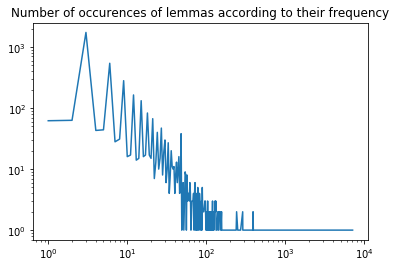

In [22]:
plt.title('Number of occurences of lemmas according to their frequency')
plt.plot(list(c.keys()) , list(c.values()))
plt.xscale('log')
plt.yscale('log')

# Représentation graphique

In [23]:
cd ../texts/

/home/tp-home004/fbertel/M2_AIC/NLP/TP3/data/texts


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
import nltk
import string
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer

path = '.'
token_dict = {}

    
def tokenize(text):
    return nltk.word_tokenize(text)
    
for dirpath, dirs, files in os.walk(path):
    for f in files:
        fname = os.path.join(dirpath, f)
       # print ("fname=", fname)
        with open(fname) as pearl:
            text = pearl.read()
            token_dict[f] = text.lower().translate(string.punctuation)


tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
tfs = tfidf.fit_transform(token_dict.values())

                   

print(tfs.shape)

#print (tfidf.vocabulary_['located'])

(1184, 5181)


Pour chaque document (ie le 1184 car il y a 1184 documents), on a pour chaque mot (5181 mots différents) le tf idf correspondant.

In [26]:
tfidf.get_feature_names()

['!',
 '#',
 '$',
 "'",
 "''",
 "''+",
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 '+',
 ',',
 '-',
 '--',
 '-lrb-',
 '-lrb-805-rrb-517-1623',
 '-rrb-',
 '.',
 '.+',
 '...',
 '.1',
 '.2',
 '.3',
 '.800',
 '/sent',
 '0',
 '0.50',
 '0.6',
 '0.65',
 '1',
 '1,182',
 '1,5',
 '1.2',
 '1.5',
 '1.57',
 '10',
 '100',
 '1000',
 '100per',
 '101',
 '101.98',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '10per',
 '10x',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '12.8',
 '120',
 '120,000',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '12th',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '15',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '16',
 '160',
 '161',
 '162',
 '163',
 '1633',
 '164',
 '165',
 '1650',
 '1653',
 '166',
 '167',
 '16

In [27]:
print(tfidf.vocabulary_['sent'])

4304


In [28]:
print(tfs[: , 4304 ]  )

  (0, 0)	0.07703117141959598
  (1, 0)	0.07417177829611254
  (2, 0)	0.052726646429972324
  (3, 0)	0.05395113208460098
  (4, 0)	0.05654441976813316
  (5, 0)	0.059195822854097975
  (6, 0)	0.05342177583631286
  (7, 0)	0.05062006986191071
  (8, 0)	0.05566259882298508
  (9, 0)	0.05632812809547616
  (10, 0)	0.09022049646102996
  (11, 0)	0.058309575036672646
  (12, 0)	0.07342860628038912
  (13, 0)	0.08980914197460253
  (14, 0)	0.0895768206677064
  (15, 0)	0.07561362424301246
  (16, 0)	0.07266165463873642
  (17, 0)	0.0900490810803002
  (18, 0)	0.09551137960520785
  (19, 0)	0.07090832365626114
  (20, 0)	0.06509879424835363
  (21, 0)	0.09741415252672073
  (22, 0)	0.093276038620129
  (23, 0)	0.0965394111251139
  (24, 0)	0.07965646524770971
  :	:
  (1159, 0)	0.08729986734816286
  (1160, 0)	0.07275553160077702
  (1161, 0)	0.07860521947727682
  (1162, 0)	0.07706343618704993
  (1163, 0)	0.07075178038688912
  (1164, 0)	0.06735650866153843
  (1165, 0)	0.07249668948254183
  (1166, 0)	0.08364830594339238


## Calcul de similarité

In [29]:
cd ../

/home/tp-home004/fbertel/M2_AIC/NLP/TP3/data


In [30]:
with open("./texts/rd_1_psg_1_3.txt", 'r') as d:
        str1 = d.read()

    
        
with open('./questions/rd_1_q_1.txt', 'r') as d:
        str2 = d.read()

        
nb_doc = 16
sim_list = {}


for i in range(1,nb_doc+1):
    texts = [filename for filename in os.listdir('./texts/') if filename.startswith("rd_" + str(i) + "_")]
    questions =  [filename for filename in os.listdir('./questions/') if filename.startswith("rd_" + str(i) + "_")]
    for text in texts:
        for question in questions: 
            with open("./texts/" + str(text), 'r') as d:
                str1 = d.read() 
            with open('./questions/' + str(question), 'r') as d:
                str2 = d.read()
            sim_list[(text,question)] = ri_basic.get_similarity(str1,str2,tfidf)

   

In [31]:
for x in list(sim_list)[0:20]:
    print (x)

('rd_1_psg_10_12.txt', 'rd_1_q_1.txt')
('rd_1_psg_10_12.txt', 'rd_1_q_10.txt')
('rd_1_psg_10_12.txt', 'rd_1_q_2.txt')
('rd_1_psg_10_12.txt', 'rd_1_q_3.txt')
('rd_1_psg_10_12.txt', 'rd_1_q_4.txt')
('rd_1_psg_10_12.txt', 'rd_1_q_5.txt')
('rd_1_psg_10_12.txt', 'rd_1_q_6.txt')
('rd_1_psg_10_12.txt', 'rd_1_q_7.txt')
('rd_1_psg_10_12.txt', 'rd_1_q_8.txt')
('rd_1_psg_10_12.txt', 'rd_1_q_9.txt')
('rd_1_psg_11_13.txt', 'rd_1_q_1.txt')
('rd_1_psg_11_13.txt', 'rd_1_q_10.txt')
('rd_1_psg_11_13.txt', 'rd_1_q_2.txt')
('rd_1_psg_11_13.txt', 'rd_1_q_3.txt')
('rd_1_psg_11_13.txt', 'rd_1_q_4.txt')
('rd_1_psg_11_13.txt', 'rd_1_q_5.txt')
('rd_1_psg_11_13.txt', 'rd_1_q_6.txt')
('rd_1_psg_11_13.txt', 'rd_1_q_7.txt')
('rd_1_psg_11_13.txt', 'rd_1_q_8.txt')
('rd_1_psg_11_13.txt', 'rd_1_q_9.txt')


In [39]:
cd ../

/home/tp-home004/fbertel/M2_AIC/NLP/TP3


In [51]:
import eval.eval1 as eval1

In [52]:
os.listdir()

['.ipynb_checkpoints',
 'Information extraction in text.ipynb',
 '__pycache__',
 'data',
 'eval',
 'pytpri.zip',
 'ri_basic.py']

In [106]:
import glob, re, pprint, csv
import xml.etree.ElementTree as ET
from collections import defaultdict
"""
if given result files in the form
score    rd_xx_psq_yy.*

and the annotated question file,
returns the MRR score 
"""

QUESTION_FILE='eval/QA4MRE-2012-EN_GS_annote.xml'

def calculate_mrr(dir, ext):
    ref = get_refs()

    mrr=0
    nb_q=0
    
    #get all files with a given extension. must be called rd_xxx_q_yyy though
    #print(glob.glob(dir+"/*."+ext))
    for sim_file in glob.glob(dir+"/*."+ext):
        r = get_first_correct_answer(ref, sim_file)
        if r != -1:
            mrr += 1/r
        nb_q+=1
    return (mrr/nb_q)

def get_refs():
    refs=defaultdict(dict)
   # qcm=open("eval/QA4MRE-2012-EN_GS_annote.xml", "r", encoding="utf-8")
    qcm_tree = ET.parse(QUESTION_FILE)
    root=qcm_tree.getroot()

    for reading_test in root.findall('.//reading-test'):
        for question in reading_test.findall('.//q'):
            for rep in question.findall('.//position'):
                refs[reading_test.attrib['r_id']][question.attrib['q_id']]=rep.attrib['rep']
                #print("rt "+reading_test.attrib['r_id']+" q "+question.attrib['q_id']+" rep "+rep.attrib['rep'])
    return refs
    
def get_first_correct_answer(ref, res_file):

    n=re.match(r".*rd_([0-9]+)_q_([0-9]+)\..*", res_file)
    rank=1
    if n:
        rd_res, q_res=n.group(1), n.group(2)
        # the result file is for a given reading doc and a given question
        # the answer is in the sentence whose id is ref[rd_res][q_res]
        with open(res_file, newline='') as csvfile:
            f = csv.reader(csvfile, delimiter='\t', quotechar='|')
            for row in f:
                #print(score)
                score=row[0]
                doc=row[1]
                #m=re.match(r"rd_([0-9]+)_psg_([0-9]+)_([0-9]+)\.", doc)
                m=re.match(r"rd_([0-9]+)_psg_([0-9]+)_([0-9]+)\.", doc)
                #print("nokn"+q_res)
                
                if m:
                    rd, p_deb, p_fin = m.group(1), m.group(2), m.group(3)
                    if(rd == rd_res) and (ref[rd_res][q_res] >= p_deb) and (ref[rd_res][q_res]<=p_fin):
                        print("first correct answer for rd "+rd+ " q "+q_res+" at rank "+str(rank))
                        return rank
                rank+=1
                        
    else:
        print("problem with filename :-(")
    return -1
        


In [93]:
ls data/

der-families-en.utf8  questions/  sem-families-wn.utf8  texts/


In [108]:
calculate_mrr("./data/questions" , 'txt')

IndexError: list index out of range